# Random Forest - Caso Kyphosis

La Kyphosis es una curvatura convexa excesivamente anormal de la espira vertebral. El dataset kyphosis contiene 81 filas y 4 columnas. Representa datos de niños que han tenido intervenciones quirúrgicas a la columna. El dataset contiene las siguientes columnas:

*Entradas*

- Age: edad en meses
- Number: el número de vértebras involucradas
- Start: el número de la primera vértebra operada

*Salida*
- Kyphosis: variable categórica con valores present o absent que indica si se desarrolló kyphosis después de la operación


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df = pd.read_csv('kyphosis.csv')

### Análisis Exploratorio

In [15]:
df.head(2)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14


In [16]:
df['Kyphosis'].unique()

array(['absent', 'present'], dtype=object)

In [17]:
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [18]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


• ¿Qué porcentaje de la muestra presenta cifosis?

In [86]:
(df[df['Kyphosis']=='present'].count()[0])/df.count()[0]

0.20987654320987653

In [ ]:
Por lo tanto hay un desbalance.

### Analisis Visual

<Figure size 3840x2880 with 0 Axes>

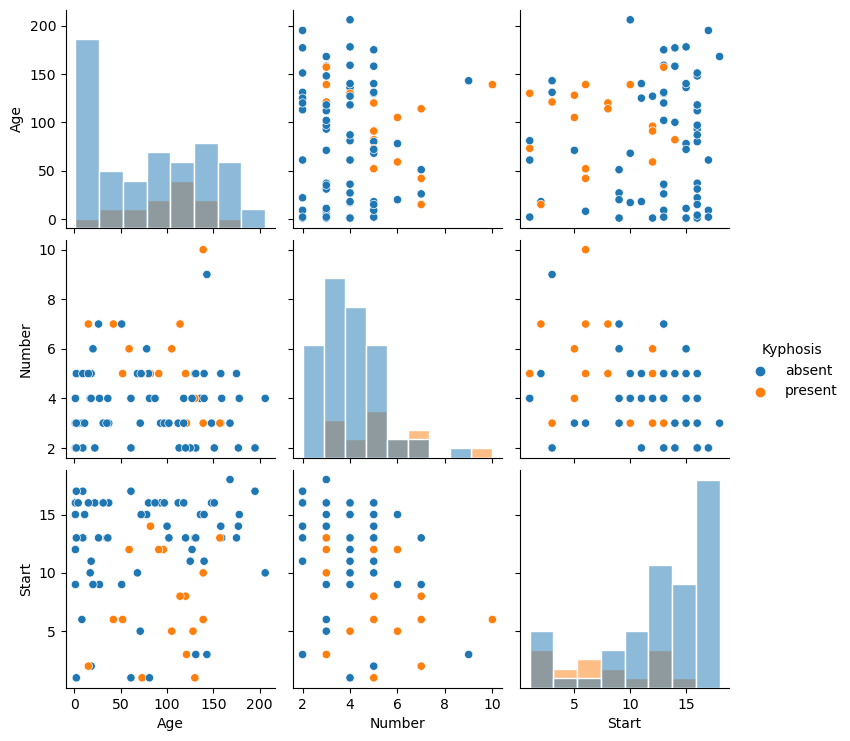

In [28]:
fig = plt.figure(dpi=600)
sns.pairplot(df, hue='Kyphosis', diag_kind='hist',
            diag_kws={'ec':'w'})

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_1244\1812517500.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( df.corr(), annot=True, cmap='coolwarm')


<Axes: >

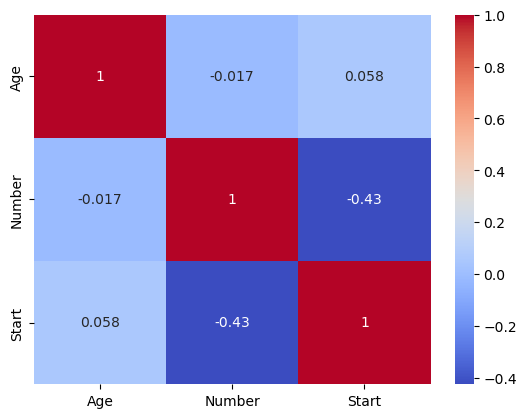

In [45]:
sns.heatmap( df.corr(), annot=True, cmap='coolwarm')

• ¿Cuál es la edad promedio de niños con cifosis?

In [29]:
df['Age'].unique()

array([ 71, 158, 128,   2,   1,  61,  37, 113,  59,  82, 148,  18, 168,
        78, 175,  80,  27,  22, 105,  96, 131,  15,   9,   8, 100,   4,
       151,  31, 125, 130, 112, 140,  93,  52,  20,  91,  73,  35, 143,
        97, 139, 136, 121, 177,  68,  72, 120,  51, 102, 114,  81, 118,
        17, 195, 159, 127,  87, 206,  11, 178, 157,  26,  42,  36],
      dtype=int64)

Si consideramos los niños como edad que van desde los 3 años hasta los 13 años, entonces:

In [39]:
a=3*12
b=13*12
conjunto=df[(df['Age']>=a) &  (df['Age']<=b)]

c=conjunto['Age'].mean()

In [44]:
print('La edad promedio de los niños es de 101.04 meses que serian '+str(c/12)+' años')

La edad promedio de los niños es de 101.04 meses que serian 8.420212765957446 años


### Formulación del modelo

In [46]:
X=df[['Age','Number','Start']]

In [47]:
y=df['Kyphosis']

### Tratamiento de variables categoricas

In [48]:
y=pd.get_dummies(y, drop_first=True)

- 0: absent
- 1: present    

### Cross Validation

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=0)

### Modelo Decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 4, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

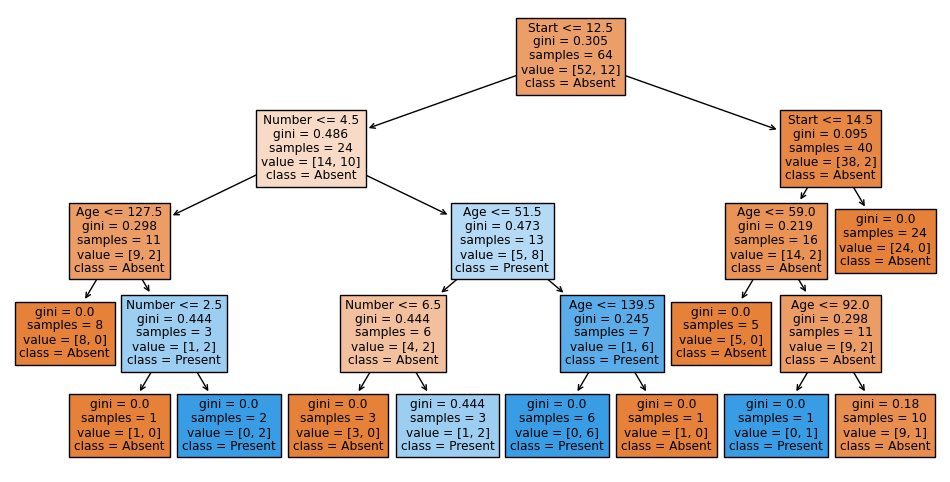

In [60]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12,6))
plot_tree(clf,feature_names = X.columns,
                 class_names=['Absent','Present'],
                 filled = True);

### Evaluación Modelo Decision Tree

In [1]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score

In [68]:
y_pred=clf.predict(X_test)

In [69]:
#desempeño set test
accuracy_score(y_test,y_pred)

0.7647058823529411

In [70]:
#desempeño set train
accuracy_score(y_train,clf.predict(X_train))

0.96875

In [84]:
#Sensibilidad
recall_score(y_train,clf.predict(X_train))

0.9166666666666666

In [71]:
confusion_matrix(y_test,y_pred)

array([[10,  2],
       [ 2,  3]], dtype=int64)

In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        12
           1       0.60      0.60      0.60         5

    accuracy                           0.76        17
   macro avg       0.72      0.72      0.72        17
weighted avg       0.76      0.76      0.76        17



### Importancia de los features

In [72]:
pd.DataFrame(clf.feature_importances_,index=X.columns, columns=["Importancia"])

,Importancia
Age,0.435432
Number,0.299802
Start,0.264766


### Modelo Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
rfc = RandomForestClassifier(n_estimators=200)

In [76]:
rfc.fit(X_train,y_train)

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_1244\3302021315.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


RandomForestClassifier(n_estimators=200)

### Evaluación del Modelo RF

In [77]:
rfc_predict = rfc.predict(X_test)

In [78]:
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print(classification_report(y_test,rfc_predict))

[[10  2]
 [ 3  2]]


              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.50      0.40      0.44         5

    accuracy                           0.71        17
   macro avg       0.63      0.62      0.62        17
weighted avg       0.69      0.71      0.70        17



In [80]:
#desempeño set test
accuracy_score(y_test,rfc_predict)

0.7058823529411765

In [87]:
#desempeño set test
accuracy_score(y_train,rfc.predict(X_train))

1.0

En el set de test se muestra que hay un 100% de desempeño, lo cual es interesante debido a que  Modelo Decision Tree, nos arrojo un valor menor. 